# UnbalancedDataset

### A python toolbox to tackle the problem of imbalanced dataset

F. Nogueira - G. Lemaitre




In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import itertools

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from unbalanced_dataset.under_sampling import RandomUnderSampler
from unbalanced_dataset.under_sampling import NearMiss
from unbalanced_dataset.under_sampling import CondensedNearestNeighbour
from unbalanced_dataset.under_sampling import OneSidedSelection
from unbalanced_dataset.under_sampling import NeighbourhoodCleaningRule
from unbalanced_dataset.under_sampling import TomekLinks
from unbalanced_dataset.under_sampling import ClusterCentroids
from unbalanced_dataset.under_sampling import EditedNearestNeighbours

from unbalanced_dataset.over_sampling import RandomOverSampler
from unbalanced_dataset.over_sampling import SMOTE

from unbalanced_dataset.combine import SMOTETomek
from unbalanced_dataset.combine import SMOTEENN

from unbalanced_dataset.ensemble import EasyEnsemble
from unbalanced_dataset.ensemble import BalanceCascade

# Save a nice dark grey as a variable
almost_black = '#262626'

/home/lemaitre/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/lemaitre/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Background

UnbalancedDataset is a python module offering a number of resampling techniques commonly used in datasets showing strong between-class imbalance.

Most classification algorithms will only perform optimally when the number of samples of each class is roughly the same. Highly skewed datasets, where the minority heavily outnumbered by one or more classes, haven proven to be a challenge while at the same time becoming more and more common.

One way of addresing this issue is by resampling the dataset as to offset this imbalance with the hope of arriving and a more robust and fair decision boundary than you would otherwise.

Resampling techniques are divided in three categories: (i) Under-sampling the majority class(es), (ii) Over-sampling the minority class and (ii) Ensemble sampling.

Bellow is a list of the methods currently implemented in this module.

* Under-sampling
    1. Random majority under-sampling with replacement
    2. Extraction of majority-minority Tomek links
    3. Under-sampling with Cluster Centroids
    4. NearMiss-(1 & 2 & 3)
    5. Condensend Nearest Neighbour
    6. One-Sided Selection
    7. Neighboorhood Cleaning Rule

* Over-sampling
    1. Random minority over-sampling with replacement
    2. SMOTE - Synthetic Minority Over-sampling Technique
    3. bSMOTE(1&2) - Borderline SMOTE of types 1 and 2
    4. SVM_SMOTE - Support Vectors SMOTE

* Over-sampling follow by under-sampling
    1. SMOTE + Tomek links
    2. SMOTE + ENN

* Ensemble sampling
    1. EasyEnsemble
    2. BalanceCascade


##### Data generation

/home/lemaitre/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


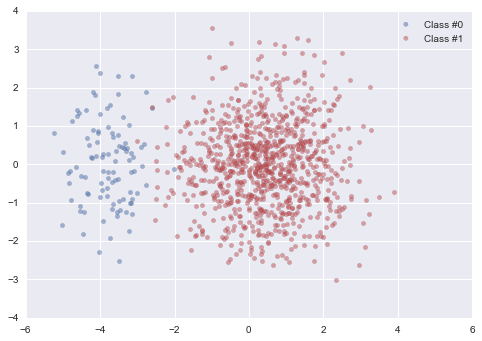

In [2]:
# Generate some data
x, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(x)

# Plot the original data
# Plot the two classes
palette = sns.color_palette()
plt.scatter(x_vis[y == 0, 0], x_vis[y == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(x_vis[y == 1, 0], x_vis[y == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()

##### Under-sampling:

The different under-sampling methods will be applied and a new dataset will be generated for each of them.

In [3]:
# Generate the new dataset using under-sampling method
verbose = False
# 'Random under-sampling'
US = RandomUnderSampler(verbose=verbose)
usx, usy = US.fit_transform(x, y)
# 'Tomek links'
TL = TomekLinks(verbose=verbose)
tlx, tly = TL.fit_transform(x, y)
# 'Clustering centroids'
CC = ClusterCentroids(verbose=verbose)
ccx, ccy = CC.fit_transform(x, y)
# 'NearMiss-1'
NM1 = NearMiss(version=1, verbose=verbose)
nm1x, nm1y = NM1.fit_transform(x, y)
# 'NearMiss-2'
NM2 = NearMiss(version=2, verbose=verbose)
nm2x, nm2y = NM2.fit_transform(x, y)
# 'NearMiss-3'
NM3 = NearMiss(version=3, verbose=verbose)
nm3x, nm3y = NM3.fit_transform(x, y)
# 'Condensed Nearest Neighbour'
CNN = CondensedNearestNeighbour(size_ngh=51, n_seeds_S=51, verbose=verbose)
cnnx, cnny = CNN.fit_transform(x, y)
# 'One-Sided Selection'
OSS = OneSidedSelection(size_ngh=51, n_seeds_S=51, verbose=verbose)
ossx, ossy = OSS.fit_transform(x, y)
# 'Neighboorhood Cleaning Rule'
NCR = NeighbourhoodCleaningRule(size_ngh=51, verbose=verbose)
ncrx, ncry = NCR.fit_transform(x, y) 
# 'Edited Neareast Neighbour'
ENN = EditedNearestNeighbours(size_ngh=51, verbose=verbose)
ennx, enny = ENN.fit_transform(x, y) 

# Apply PCA to be able to visualise the results
usx_vis = pca.transform(usx)
tlx_vis = pca.transform(tlx)
ccx_vis = pca.transform(ccx)
nm1x_vis = pca.transform(nm1x)
nm2x_vis = pca.transform(nm2x)
nm3x_vis = pca.transform(nm3x)
cnnx_vis = pca.transform(cnnx)
ossx_vis = pca.transform(ossx)
ncrx_vis = pca.transform(ncrx)
ennx_vis = pca.transform(ennx)

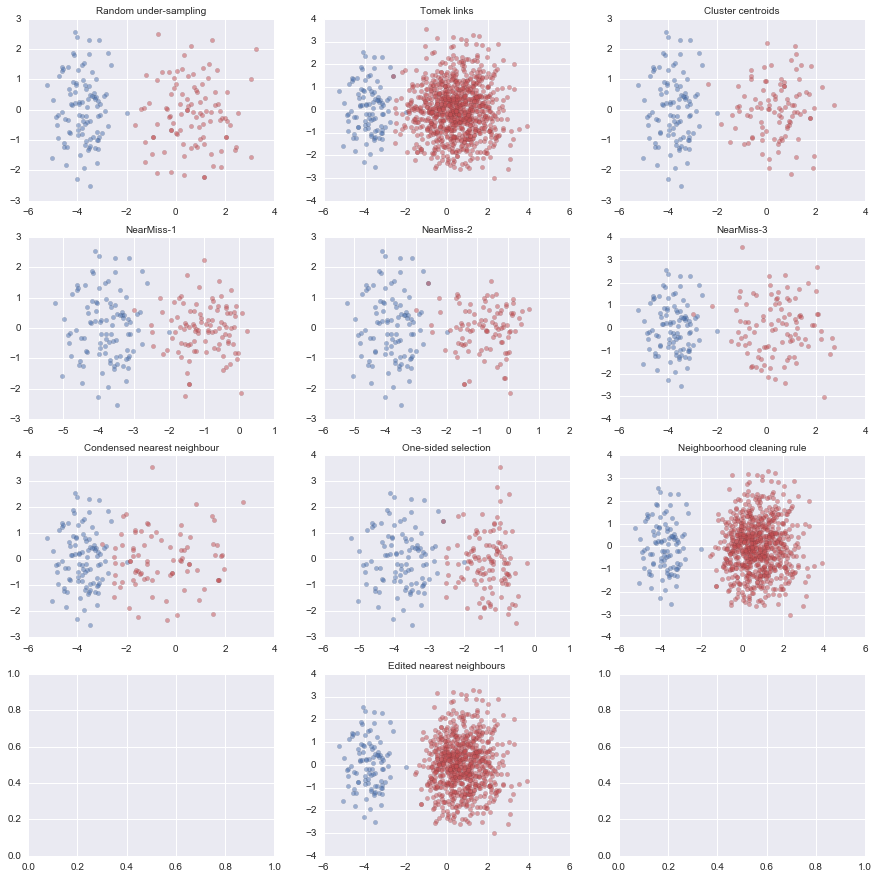

In [4]:
# Initialise the figure
palette = sns.color_palette()
fs = 10 # fontsize
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

# Random under-sampling
axes[0, 0].scatter(usx_vis[usy == 0, 0], usx_vis[usy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[0, 0].scatter(usx_vis[usy == 1, 0], usx_vis[usy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 0].set_title('Random under-sampling', fontsize=fs)
# Tomek links
axes[0, 1].scatter(tlx_vis[tly == 0, 0], tlx_vis[tly == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[0, 1].scatter(tlx_vis[tly == 1, 0], tlx_vis[tly == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 1].set_title('Tomek links', fontsize=fs)
# Cluster centroids
axes[0, 2].scatter(ccx_vis[ccy == 0, 0], ccx_vis[ccy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[0, 2].scatter(ccx_vis[ccy == 1, 0], ccx_vis[ccy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 2].set_title('Cluster centroids', fontsize=fs)

# NearMiss-1
axes[1, 0].scatter(nm1x_vis[nm1y == 0, 0], nm1x_vis[nm1y == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[1, 0].scatter(nm1x_vis[nm1y == 1, 0], nm1x_vis[nm1y == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[1, 0].set_title('NearMiss-1', fontsize=fs)
# NearMiss-2
axes[1, 1].scatter(nm2x_vis[nm2y == 0, 0], nm2x_vis[nm2y == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[1, 1].scatter(nm2x_vis[nm2y == 1, 0], nm2x_vis[nm2y == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[1, 1].set_title('NearMiss-2', fontsize=fs)
# NearMiss-3
axes[1, 2].scatter(nm3x_vis[nm3y == 0, 0], nm3x_vis[nm3y == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[1, 2].scatter(nm3x_vis[nm3y == 1, 0], nm3x_vis[nm3y == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[1, 2].set_title('NearMiss-3', fontsize=fs)

# Condensed nearest neighbour
axes[2, 0].scatter(cnnx_vis[cnny == 0, 0], cnnx_vis[cnny == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[2, 0].scatter(cnnx_vis[cnny == 1, 0], cnnx_vis[cnny == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[2, 0].set_title('Condensed nearest neighbour', fontsize=fs)
# One-sided selection
axes[2, 1].scatter(ossx_vis[ossy == 0, 0], ossx_vis[ossy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[2, 1].scatter(ossx_vis[ossy == 1, 0], ossx_vis[ossy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[2, 1].set_title('One-sided selection', fontsize=fs)
# Neighboorhood cleaning rule
axes[2, 2].scatter(ncrx_vis[ncry == 0, 0], ncrx_vis[ncry == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[2, 2].scatter(ncrx_vis[ncry == 1, 0], ncrx_vis[ncry == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[2, 2].set_title('Neighboorhood cleaning rule', fontsize=fs)

# Edited nearest neighbours
axes[3, 1].scatter(ncrx_vis[ncry == 0, 0], ncrx_vis[ncry == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[3, 1].scatter(ncrx_vis[ncry == 1, 0], ncrx_vis[ncry == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[3, 1].set_title('Edited nearest neighbours', fontsize=fs)

plt.show()

##### Over-sampling

In [5]:
# Generate the new dataset using under-sampling method
verbose = False
ratio = 'auto'
# 'Random over-sampling'
OS = RandomOverSampler(ratio=ratio, verbose=verbose)
osx, osy = OS.fit_transform(x, y)
# 'SMOTE'
smote = SMOTE(ratio=ratio, verbose=verbose, kind='regular')
smox, smoy = smote.fit_transform(x, y)
# 'SMOTE bordeline 1'
bsmote1 = SMOTE(ratio=ratio, verbose=verbose, kind='borderline1')
bs1x, bs1y = bsmote1.fit_transform(x, y)
# 'SMOTE bordeline 2'
bsmote2 = SMOTE(ratio=ratio, verbose=verbose, kind='borderline2')
bs2x, bs2y = bsmote2.fit_transform(x, y)
# 'SMOTE SVM'
svm_args={'class_weight': 'auto'}
svmsmote = SMOTE(ratio=ratio, verbose=verbose, kind='svm', **svm_args)
svsx, svsy = svmsmote.fit_transform(x, y)
# 'SMOTE Tomek links'
STK = SMOTETomek(ratio=ratio, verbose=verbose)
stkx, stky = STK.fit_transform(x, y)
# 'SMOTE ENN'
SENN = SMOTEENN(ratio=ratio, verbose=verbose)
ennx, enny = SENN.fit_transform(x, y)

# 'EasyEnsemble'
EE = EasyEnsemble(verbose=verbose)
eex, eey = EE.fit_transform(x, y)
# 'BalanceCascade'
BS = BalanceCascade(verbose=verbose)
bsx, bsy = BS.fit_transform(x, y)

# Apply PCA to be able to visualise the results
osx_vis = pca.transform(osx)
smox_vis = pca.transform(smox)
bs1x_vis = pca.transform(bs1x)
bs2x_vis = pca.transform(bs2x)
svsx_vis = pca.transform(svsx)
stkx_vis = pca.transform(stkx)
ennx_vis = pca.transform(ennx)

# Project each subset of the ensemble
eex_vis = []
for e in eex:
    eex_vis.append(pca.transform(e))
bsx_vis = []
for e in bsx:
    bsx_vis.append(pca.transform(e))

/home/lemaitre/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


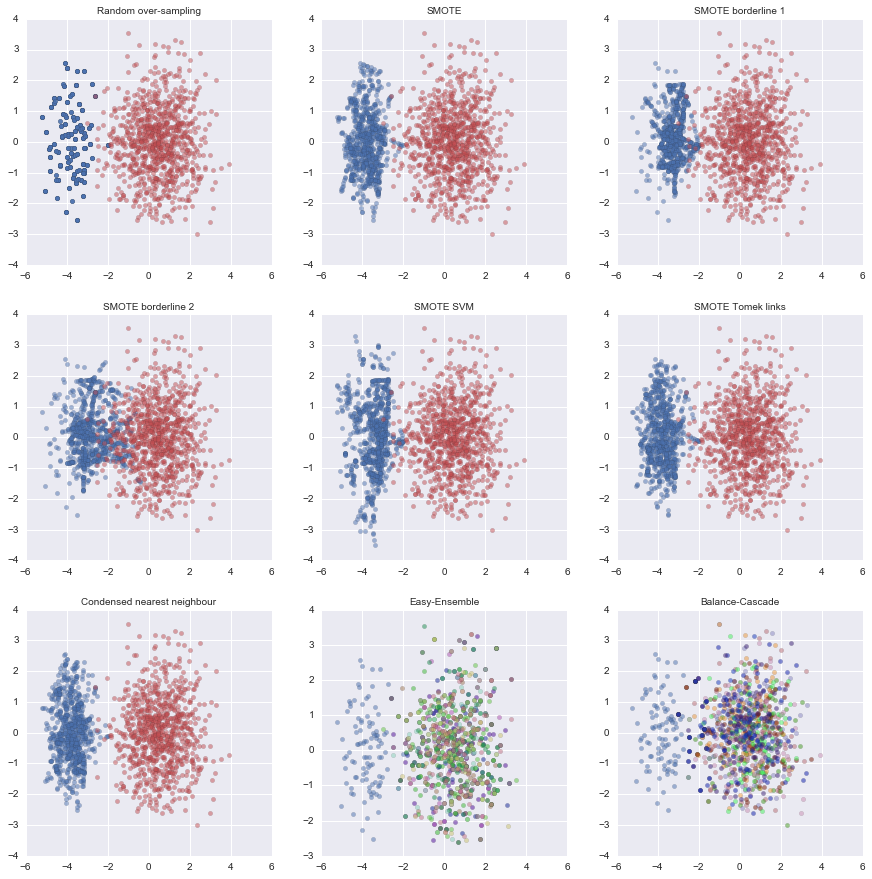

In [6]:
# Initialise the figure
palette = sns.color_palette()
fs = 10 # fontsize
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

# Random over-sampling
axes[0, 0].scatter(osx_vis[osy == 0, 0], osx_vis[osy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[0, 0].scatter(osx_vis[osy == 1, 0], osx_vis[osy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 0].set_title('Random over-sampling', fontsize=fs)
# SMOTE
axes[0, 1].scatter(smox_vis[smoy == 0, 0], smox_vis[smoy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[0, 1].scatter(smox_vis[smoy == 1, 0], smox_vis[smoy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 1].set_title('SMOTE', fontsize=fs)
# SMOTE borderline 1
axes[0, 2].scatter(bs1x_vis[bs1y == 0, 0], bs1x_vis[bs1y == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[0, 2].scatter(bs1x_vis[bs1y == 1, 0], bs1x_vis[bs1y == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 2].set_title('SMOTE borderline 1', fontsize=fs)

# SMOTE borderline 2
axes[1, 0].scatter(bs2x_vis[bs2y == 0, 0], bs2x_vis[bs2y == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[1, 0].scatter(bs2x_vis[bs2y == 1, 0], bs2x_vis[bs2y == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[1, 0].set_title('SMOTE borderline 2', fontsize=fs)
# SMOTE SVM
axes[1, 1].scatter(svsx_vis[svsy == 0, 0], svsx_vis[svsy == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[1, 1].scatter(svsx_vis[svsy == 1, 0], svsx_vis[svsy == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[1, 1].set_title('SMOTE SVM', fontsize=fs)
# SMOTE Tomek links
axes[1, 2].scatter(stkx_vis[stky == 0, 0], stkx_vis[stky == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[1, 2].scatter(stkx_vis[stky == 1, 0], stkx_vis[stky == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[1, 2].set_title('SMOTE Tomek links', fontsize=fs)

# SMOTE ENN
axes[2, 0].scatter(ennx_vis[enny == 0, 0], ennx_vis[enny == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes[2, 0].scatter(ennx_vis[enny == 1, 0], ennx_vis[enny == 1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[2, 0].set_title('Condensed nearest neighbour', fontsize=fs)

# Easy-Ensemble
axes[2, 1].scatter(eex_vis[0][eey[0] == 0, 0], eex_vis[0][eey[0] == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
for iy, e in enumerate(eex_vis):
    axes[2, 1].scatter(e[eey[iy] == 1, 0], e[eey[iy] == 1, 1], label="Class #1", alpha=0.5, 
                edgecolor=almost_black, facecolor=np.random.rand(3,), linewidth=0.15)
axes[2, 1].set_title('Easy-Ensemble', fontsize=fs)
# Balance-Cascade
axes[2, 2].scatter(bsx_vis[0][bsy[0] == 0, 0], bsx_vis[0][bsy[0] == 0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
for iy, e in enumerate(bsx_vis):
    axes[2, 2].scatter(e[bsy[iy] == 1, 0], e[bsy[iy] == 1, 1], label="Class #1", alpha=0.5, 
                edgecolor=almost_black, facecolor=np.random.rand(3,), linewidth=0.15)
axes[2, 2].set_title('Balance-Cascade', fontsize=fs)

plt.show()